In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## importing dataset

In [2]:
df= pd.read_csv('C:/Users/sony/Desktop/datascience/Airline-Project/Air_line_data.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(13354, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [7]:
test_data = df[df['Price'].isnull()]

In [8]:
df['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
37h 10m      1
42h 5m       1
29h 10m      1
3h 45m       1
40h 20m      1
Name: Duration, Length: 374, dtype: int64

In [9]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(10682, 11)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA
### From description we can see that Date_of_Journey is a object data type,
### Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [14]:
def get_day(day):
    return day.split("/")[0]

def get_month(month):
    return month.split("/")[1]

df['Journey_day'] = df['Date_of_Journey'].apply(lambda x: f"{get_day(x)}")
df['Journey_month'] = df['Date_of_Journey'].apply(lambda x: f"{get_month(x)}")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03


In [15]:
df['Journey_day'].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [16]:
df['Journey_month'].unique()

array(['03', '05', '06', '04'], dtype=object)

#### Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.


In [17]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03


In [19]:
# Departure time is when a plane leaves the gate. 
# we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662.0,1,05,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218.0,12,05,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302.0,01,03,16,50


In [21]:
# Extracting Hours
df["Arv_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting Minutes
df["Arv_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Now we can drop Arv_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,05,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,9,06,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,12,05,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,01,03,16,50,21,35


In [23]:
# spliting Duration time into hrs,min
s=pd.to_timedelta(df['Duration'])
df['Dur_hour']=s.dt.components['hours']
df['Dur_min']=s.dt.components['minutes']

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,01,03,16,50,21,35,4,45


In [24]:
df.drop(["Duration"], axis = 1, inplace = True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.0,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.0,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.0,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.0,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.0,01,03,16,50,21,35,4,45


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [26]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [28]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,01,03,16,50,21,35,4,45


In [29]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [31]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,0,3897.0,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662.0,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882.0,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302.0,01,03,16,50,21,35,4,45


In [32]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [33]:
df.shape

(10682, 13)

In [34]:
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [35]:
X.shape

(10682, 12)

In [36]:
X

array([['IndiGo', 'Banglore', 'New Delhi', ..., 10, 2, 50],
       ['Air India', 'Kolkata', 'Banglore', ..., 15, 7, 25],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 25, 19, 0],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 20, 3, 0],
       ['Vistara', 'Banglore', 'New Delhi', ..., 10, 2, 40],
       ['Air India', 'Delhi', 'Cochin', ..., 15, 8, 20]], dtype=object)

#### Performing OneHot encoding to categorical Features

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
X.shape

(10682, 32)

In [39]:
X

array([[0.0, 0.0, 0.0, ..., 10, 2, 50],
       [0.0, 1.0, 0.0, ..., 15, 7, 25],
       [0.0, 0.0, 0.0, ..., 25, 19, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 20, 3, 0],
       [0.0, 0.0, 0.0, ..., 10, 2, 40],
       [0.0, 1.0, 0.0, ..., 15, 8, 20]], dtype=object)

In [40]:
y

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [41]:
X.ndim

2

In [42]:
#y= y.reshape(-1,1)

In [43]:
y.ndim

1

In [44]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
#y = sc.fit_transform(y)

In [45]:
X

array([[0.0, 0.0, 0.0, ..., 10, 2, 50],
       [0.0, 1.0, 0.0, ..., 15, 7, 25],
       [0.0, 0.0, 0.0, ..., 25, 19, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 20, 3, 0],
       [0.0, 0.0, 0.0, ..., 10, 2, 40],
       [0.0, 1.0, 0.0, ..., 15, 8, 20]], dtype=object)

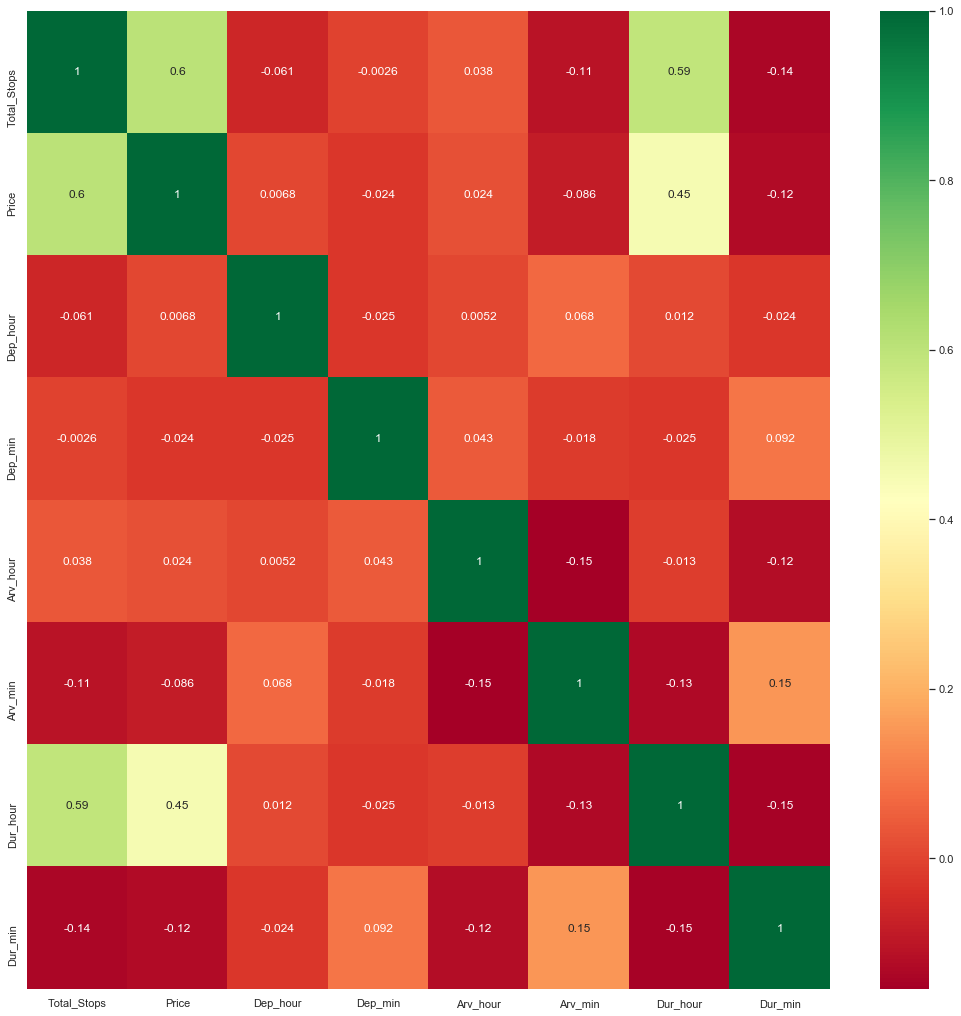

In [46]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Random Forest 

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(n_estimators = 700, random_state = 0)
RFC.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [49]:
y_pred = RFC.predict(X_test)

In [50]:
RFC.score(X_train,y_train)

0.9564185634931667

In [51]:
RFC.score(X_test,y_test)

0.807897230976729

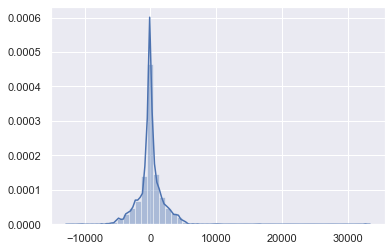

In [52]:
sns.distplot(y_test-y_pred)

# XGboost Model apply

In [53]:
import xgboost 
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
XG_pred=regressor.predict(X_test)

In [55]:
regressor.score(X_train,y_train)

0.9371039330994078

In [56]:
regressor.score(X_test,y_test)

0.8428584820794098

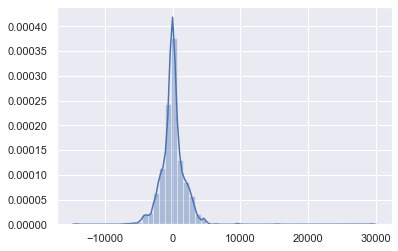

In [57]:
sns.distplot(y_test-XG_pred)

In [58]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, XG_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, XG_pred))
print('MSE:', metrics.mean_squared_error(y_test, XG_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, XG_pred)))

R square: 0.9180732443979673
MAE: 1172.169988365334
MSE: 3223081.0244971286
RMSE: 1795.2941331428476
